# Chapitre 14 - Data - Un fichier contenant des notes

## Importation d'un fichier CSV

In [1]:
# pour lire en UTF8, n'est pas toujours nécessaire
import codecs

# ouverture du fichier en mode lecture 'r' pour 'read'
fichier = codecs.open("notes.csv", 'r', 'utf-8')

# on crée la table de données
notes = []

# on lit le fichier pour transférer les données dans la table
for ligne in fichier:
    # on enlève le retour à la ligne \r et la nouvelle ligne \n
    ligne = ligne.replace('\r','')
    ligne = ligne.replace('\n','')
    # on récupère chaque données de la ligne séparées par une virgule sous la forme d'un tableau
    ligne = ligne.split(',')
    # on rajoute ce tableau à notre table
    notes.append(ligne)

# fermeture du fichier
fichier.close()

In [2]:
# on affiche le résultat obtenu
notes

[['Noms', 'Maths', 'Français', 'Histoire'],
 ['Achille', '12', '14', '15'],
 ['Bertille', '17', '11', '9'],
 ['Carole', '15', '15', '16'],
 ['Damien', '11', '13', '12'],
 ['Eric', '19', '15', '18'],
 ['Fabrice', '14', '17', '17']]

Quel est le type de l'objet `notes` ?

*`notes` est du type table (un tableau 2D)*


## Exercices

**Exercice 1 :** Écrire un programme qui calcule la moyenne de chaque élèves.

In [3]:
def moyennes_eleve(tab):
    '''
    calcule la moyenne par élève
    le résultat peut être renvoyé dans un dictionnaire
    '''
    dico = {}
    # on démarre à la ligne 1 pour éviter les descripteurs de la ligne 0
    for i in range(1, len(tab)):
        ligne = tab[i]
        nom = ligne[0]
        somme = 0
        for j in range(1, len(ligne)):
            somme = somme + float(ligne[j])
        moyenne = somme / (len(ligne)-1)
        # on remplit le dictionnaire
        dico[nom] = moyenne
    return dico

In [4]:
moyennes_eleve(notes)

{'Achille': 13.666666666666666,
 'Bertille': 12.333333333333334,
 'Carole': 15.333333333333334,
 'Damien': 12.0,
 'Eric': 17.333333333333332,
 'Fabrice': 16.0}

**Exercice 2:** Écrire un programme qui calcule la moyenne dans chaque matières.

In [5]:
def moyennes_matiere(tab):
    '''
    calcule la moyenne par matière
    le résultat peut être renvotyé dans un dictionnaire
    '''
    dico = {}
    # dimension du tableau
    nb_lignes = len(tab)
    nb_colonnes = len(tab[0])
    
    # on démarre à la colonne 1 pour éviter les noms d'élèves
    for j in range(1, nb_colonnes):
        matiere = tab[0][j]
        somme = 0
        for i in range(1, nb_lignes):
            somme = somme + float(tab[i][j])
        moyenne = somme / (nb_lignes - 1)
        dico[matiere] = moyenne
        
    return dico

In [6]:
moyennes_matiere(notes)

{'Maths': 14.666666666666666, 'Français': 14.166666666666666, 'Histoire': 14.5}

## Utilisation du module `matplotlib`

Le module `matplotlib` est un module qui permet, entres autres, d'effectuer des graphiques (courbes, histogrammes, diagrammes circulaires, ...) <br/>
Voyons son mode de fonctionnement.
*(Aucune connaissance n'est exigible sur l'utilisation de ce module)*

On va commencer par charger le module `matplotlib` qui par défaut ne fait pas partie du noyau Python 3.

In [7]:
import sys
!{sys.executable} -m pip install matplotlib

* Pour tracer une courbe

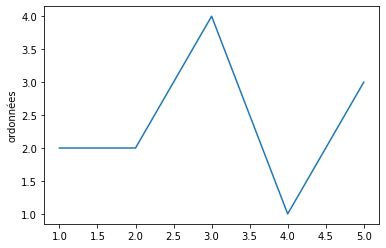

In [8]:
import matplotlib.pyplot as plt

# liste des abscisses
listeX = [1 , 2 , 3 , 4 , 5]

# liste des ordonnées
listeY = [2 , 2 , 4 , 1 , 3]

# on trace la courbe avec plot()
plt.plot(listeX, listeY)

# on peut rajouter une étiquette pour l’axe des ordonnées
plt.ylabel('ordonnées')

# ne pas oublier de demande à afficher le résultat
plt.show()

* Pour tracer un diagramme en bâtons

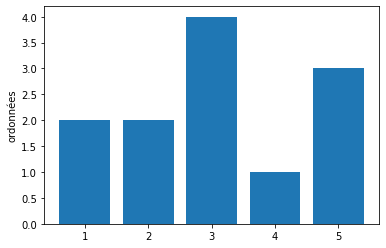

In [9]:
# l'import a déjà été fait dans la cellule précédente, ce n'est donc pas nécessaire
#import matplotlib.pyplot as plt


# liste des abscisses
listeX = [1 , 2 , 3 , 4 , 5]

# liste des ordonnées
listeY = [2 , 2 , 4 , 1 , 3]

# on trace le diagramme avec bar()
plt.bar(listeX, listeY)

# une étiquette pour l’axe des ordonnées
plt.ylabel('ordonnées')

# ne pas oublier d’afficher le résultat
plt.show()

## Exercices

**Exercice 3 :** Écrire un programme qui affiche le diagramme en bâtons des notes obtenus dans chaque matière par un élève choisi par l’utilisateur. <br />
On pourra aussi rajouter une ligne horizontale corerspondant à la moyenne générale de l'élève.

In [10]:
def moyenne_bar(prenom,tab):
    '''
    Entrées :
    'prenom' est le prénom de l'élève
    'tab' est le tableau contenant les notes de tous les élèves
    '''
    # dimension du tableau
    nb_lignes = len(tab)
    nb_colonnes = len(tab[0])
        
    # on récupère la moyenne de prenom (facile on a déjà une fonction pour ça)
    moyenne = moyennes_eleve(tab)[prenom]
    tab_moyenne = [0] * (nb_colonnes - 1)
    for j in range(len(tab_moyenne)) :
        tab_moyenne[j] = moyenne
    
    # on recupère les notes de prenom
    # on cherche la ligne de prenom
    i = 1
    trouve = False
    while i < nb_lignes and not trouve:
        if tab[i][0] == prenom :
            trouve = True
        else :
            i = i + 1
    # on récupère ses notes
    ses_notes = [0] * (nb_colonnes - 1)
    for j in range(1, nb_colonnes):
        ses_notes[j-1] = float(tab[i][j])
    
    # on récupère les matières des notes de prenom
    # le nom des matières sont sur la première ligne
    matieres = [0] * (nb_colonnes - 1)
    for j in range(1, nb_colonnes):
        matieres[j-1] = tab[0][j]
        
    plt.bar(matieres, ses_notes)
    plt.plot(matieres, tab_moyenne, 'r')
    plt.xlabel("notes de "+prenom)
    
    plt.show()

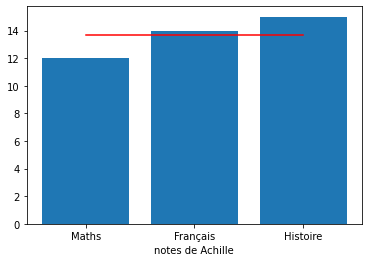

In [11]:
moyenne_bar('Achille',notes)

**Exercice 3 (bis):** Écrire un programme qui affiche le diagramme en bâtons des notes obtenus dans chaque matière par un élève choisi par l’utilisateur. <br />
On rajoutera une ligne corerspondant à la moyenne dans chaque matière de tous les élèves.

In [12]:
def moyenne_bar2(prenom,tab):
    '''
    Entrées :
    'prenom' est le prénom de l'élève
    'tab' est le tableau contenant les notes de tous les élèves
    '''
    # dimension du tableau
    nb_lignes = len(tab)
    nb_colonnes = len(tab[0])
          
    # on recupère les notes de prenom
    # on cherche la ligne de prenom
    i = 1
    trouve = False
    while i < nb_lignes and not trouve:
        if tab[i][0] == prenom :
            trouve = True
        else :
            i = i + 1
    # on récupère ses notes
    ses_notes = [0] * (nb_colonnes - 1)
    for j in range(1, nb_colonnes):
        ses_notes[j-1] = float(tab[i][j])
    
    # on récupère les matières des notes de prenom
    # le nom des matières sont sur la première ligne
    matieres = [0] * (nb_colonnes - 1)
    for j in range(1, nb_colonnes):
        matieres[j-1] = tab[0][j]
    
    # on récupère la moyenne dans chaque matière
    mati_moyenne = [0] * (nb_colonnes - 1)
    dico_moyennes = moyennes_matiere(tab)
    for i in range(len(matieres)) :
        matiere = matieres[i]
        mati_moyenne[i] = dico_moyennes[matiere]
        
        
    plt.bar(matieres, ses_notes)
    plt.plot(matieres, mati_moyenne, 'r')
    plt.xlabel("notes de "+prenom)
    
    plt.show()

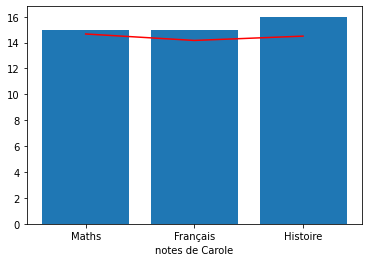

In [13]:
moyenne_bar2('Carole',notes)

## Traitement de fichier et retour

**Exercice 4 :** Écrire un programme qui rajoute une ligne *« moyenne par matière »* et une colonne *« moyenne par élève »* au fichier `notes.csv` avec les données calculées aux exercices précédents.

In [14]:
def complete(tab) :
    # calculs des moyennes par élèves et par matières
    dico_eleves = moyennes_eleve(tab)
    dico_matieres = moyennes_matiere(tab)
    #pour calculer la moyenne général de la classe
    somme = 0
    
    #on rajoute au tableau les moyennes par élèves
    tab[0].append('moyennes')
    for i in range(1,len(tab)):
        eleve = tab[i][0]
        moyenne = dico_eleves[eleve]
        tab[i].append(str(moyenne))
        somme = somme + moyenne
    print(tab)
    #moyenne générale
    moyenne_g = somme / (len(tab)-1)
    
    #on rajoute au tableau les moyennes par matières
    tab_moy_mat = ['moyennes par matières']
    for i in range(1,len(tab[0])-1):
        matiere = tab[0][i]
        moyenne = dico_matieres[matiere]
        tab_moy_mat.append(str(moyenne))
    tab_moy_mat.append(str(moyenne_g))
    return tab

In [15]:
complete(notes)

[['Noms', 'Maths', 'Français', 'Histoire', 'moyennes'], ['Achille', '12', '14', '15', '13.666666666666666'], ['Bertille', '17', '11', '9', '12.333333333333334'], ['Carole', '15', '15', '16', '15.333333333333334'], ['Damien', '11', '13', '12', '12.0'], ['Eric', '19', '15', '18', '17.333333333333332'], ['Fabrice', '14', '17', '17', '16.0']]


[['Noms', 'Maths', 'Français', 'Histoire', 'moyennes'],
 ['Achille', '12', '14', '15', '13.666666666666666'],
 ['Bertille', '17', '11', '9', '12.333333333333334'],
 ['Carole', '15', '15', '16', '15.333333333333334'],
 ['Damien', '11', '13', '12', '12.0'],
 ['Eric', '19', '15', '18', '17.333333333333332'],
 ['Fabrice', '14', '17', '17', '16.0']]

On sauvegarde le travail sur un fichier `.csv`.

In [16]:
notes_plus = complete(notes)


# création du fichier en mode écriture 'w' pour 'write'
resultat = codecs.open("notes_complété.csv", 'w', 'utf-8')

# pour chaque ligne moins la dernière
for i in range(len(notes_plus)-1) :
    # pour chaque case moins la dernière
    ligne = notes_plus[i]
    for j in range(len(ligne)-1):
        resultat.write(str(ligne[j]))
        resultat.write(',')
    # pour la dernière case
    resultat.write(str(ligne[-1]))
    #saut de ligne
    resultat.write('\r\n')

# pour la dernière ligne
# pour chaque case moins la dernière
ligne = notes_plus[-1]
for j in range(len(ligne)-1):
    resultat.write(str(ligne[j]))
    resultat.write(',')
# pour la dernière case
resultat.write(str(ligne[-1]))

#on ferme le fichier
resultat.close()

[['Noms', 'Maths', 'Français', 'Histoire', 'moyennes', 'moyennes'], ['Achille', '12', '14', '15', '13.666666666666666', '13.666666666666666'], ['Bertille', '17', '11', '9', '12.333333333333334', '12.333333333333334'], ['Carole', '15', '15', '16', '15.333333333333334', '15.333333333333334'], ['Damien', '11', '13', '12', '12.0', '12.0'], ['Eric', '19', '15', '18', '17.333333333333332', '17.333333333333332'], ['Fabrice', '14', '17', '17', '16.0', '16.0']]
